# 5. Seaborn

In [3]:
#!pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('./data/05_data1.csv')
data.head()

,no,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
0,1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
1,5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
2,6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
3,7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
4,9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0


In [8]:
data.shape

(3000, 18)

In [9]:
data.dtypes

no                 int64
city_code          int64
gender             int64
age_code           int64
height             int64
weight             int64
waist            float64
systolic           int64
diastolic          int64
blood_sugar        int64
cholesterol        int64
triglycerides      int64
HDL              float64
LDL                int64
hemoglobin       float64
serum            float64
smoking            int64
drinking           int64
dtype: object

In [21]:
# 데이터 전처리 : 주요 변수 6개만 선택
data6 = data.copy()
data6 = data6[['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]
data6.head(3)

,gender,height,weight,waist,drinking,smoking
0,1,165,60,72.1,0,1
1,2,155,50,75.2,0,1
2,1,185,85,94.0,1,3


In [22]:
# 데이터 전처리 : 라벨 매핑(label mapping)
# gender에서 1은 'Male', 2는 'Female'로 변경
data6['gender'] = data6['gender'].map({1: 'Male', 2: 'Female'})
data6.head(3)

,gender,height,weight,waist,drinking,smoking
0,Male,165,60,72.1,0,1
1,Female,155,50,75.2,0,1
2,Male,185,85,94.0,1,3


In [23]:
# drinking, smoking
data6['drinking'] = data6['drinking'].replace({0: 'Non-drinking', 1: 'drinking'})
data6['smoking'] = data6['smoking'].replace({1: 'Non-smoking', 2: 'Quit-smoking', 3: 'Smoking'})
data6.head(3)

,gender,height,weight,waist,drinking,smoking
0,Male,165,60,72.1,Non-drinking,Non-smoking
1,Female,155,50,75.2,Non-drinking,Non-smoking
2,Male,185,85,94.0,drinking,Smoking


In [28]:
# 데이터 집계1 : 성별과 음주 여부별 빈도
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
drinking = drinking.to_frame(name='count')
drinking = drinking.reset_index()              # drinking.reset_index(inplace=True)
drinking.head()

,gender,drinking,count
0,Female,Non-drinking,888
1,Female,drinking,611
2,Male,Non-drinking,415
3,Male,drinking,1086


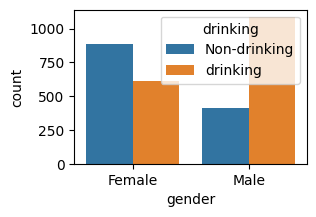

In [37]:
# 막대 그래프1 : 성별에 따른 음주 여부 분포
# 여자는 음주를 하지 않는 사람이 더 많이 나타났고,
# 남자는 음주를 하는 사람이 그렇지 않은 사람보다 약 2.5배 정도 많음
plt.figure(figsize=(3, 2))
sns.barplot(x='gender', y='count', hue='drinking', data=drinking)
plt.show()

In [38]:
# 데이터 집계2 : 성별과 흡연 상태별 빈도
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count()
smoking = smoking.to_frame(name='count')
smoking = smoking.reset_index()
smoking.head()

,gender,smoking,count
0,Female,Non-smoking,1422
1,Female,Quit-smoking,45
2,Female,Smoking,32
3,Male,Non-smoking,502
4,Male,Quit-smoking,519


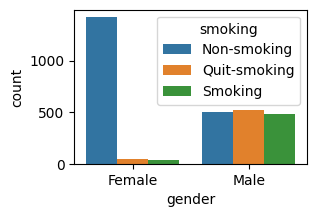

In [39]:
# 막대 그래프2 : 성별에 따른 흡연 상태 분포
# 여자는 음주를 하지 않는 사람이 더 많이 나타났고,
# 남자는 음주를 하는 사람이 그렇지 않은 사람보다 약 2.5배 정도 많음
plt.figure(figsize=(3, 2))
sns.barplot(x='gender', y='count', hue='smoking', data=smoking)
plt.show()

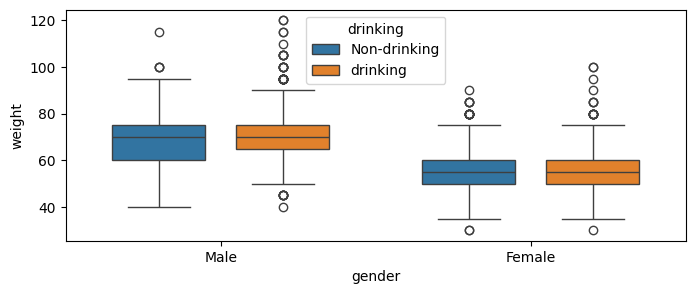

In [49]:
# 상자수염 그래프 : 성별 및 음주 여부에 따른 몸무게 분포 비교
plt.figure(figsize=(8, 3))
sns.boxplot(x='gender', y='weight', hue='drinking', widths=0.3, data=data6)
plt.show()

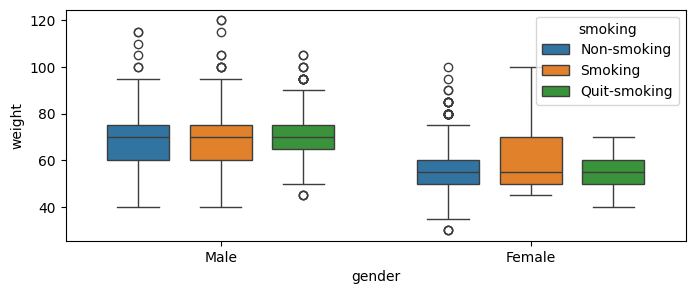

In [51]:
# 상자수염 그래프 : 성별 및 음주 여부에 따른 몸무게 분포 비교
plt.figure(figsize=(8, 3))
sns.boxplot(x='gender', y='weight', hue='smoking', widths=0.2, data=data6)
plt.show()

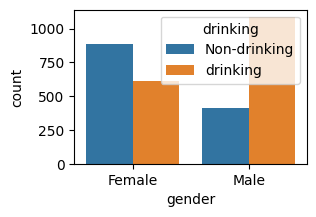

In [52]:
# 성별에 따른 음주 여부 분포
# -> 막대 그래프로 그리기 위해서 먼저 데이터를 집계함
plt.figure(figsize=(3, 2))
sns.barplot(x='gender', y='count', hue='drinking', data=drinking)
plt.show()

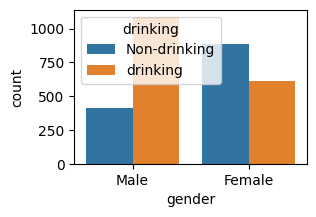

In [53]:
# 카운트 플롯 : 성별에 따른 음주 여부 분포
plt.figure(figsize=(3, 2))
sns.countplot(x='gender', hue='drinking', data=data6)
plt.show()